In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from matplotlib import style


(1000, 5)
(1000,)


Text(0.5, 1.0, 'random data samples')

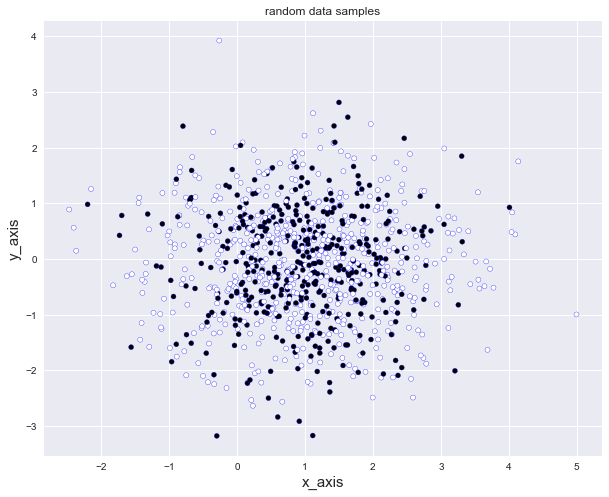

In [8]:
from sklearn import datasets
x_data, y_data = datasets.make_classification(n_samples=1000, n_features=5, n_classes=2, n_redundant=0,n_clusters_per_class=1, weights=[0.5, 0.3], random_state=42)
fig, ax = plt.subplots(figsize=(10, 8))
print(x_data.shape)
print(y_data.shape)
style.use('seaborn')
plt.xlabel("x_axis", fontsize=15)
plt.ylabel("y_axis", fontsize=15)
plt.scatter(x_data[:,0], x_data[:,1], marker="o", c=y_data, s=25, edgecolor="blue")
plt.title('random data samples')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [10]:
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)


In [11]:
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

In [12]:
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

In [21]:
x_train.shape

(5, 800)

In [22]:
y_train.shape

(1, 800)

In [23]:
x_train = x_train.reshape(5,800)
y_train = y_train.reshape(1,800)

In [24]:
m = 800
epochs = 1500

layers = [Layer(2, 3, 'tanh'), Layer(3, 1, 'sigmoid')]
costs = [] 

for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)

A = x_train
for layer in layers:
    A = layer.feedforward(A)
print(A)

ValueError: shapes (3,2) and (5,800) not aligned: 2 (dim 1) != 5 (dim 0)